The script based on https://github.com/moondra2017/Computer-Vision

 Key differences:
 - works on standard Python libraries, NumPy and Pillow
 - modified to meet the requirements of Rails Reactor MLSchool test task
 ---
 
 

**Description:** 

This is a console tool are made for finding duplicates and similar images in user provided folder.



**Usage:** 

arguments:
 
  -h, --help            show this help message and exit
  
  --path PATH           folder with images


<p style="text-align: center;"> Work flow </p>


![](WorkFlow.png)

# Results analysis and parameters optimization

As you can see on figures below there are two most influential parameters in the script:


*   Common height and width all images transformed to
*   Similarity threshold (e. g. hamming distance threshold)



  Increasing **common height and width** leads to growing distance between similar and non similar pairs of images, which gives more space to tweak the similarity threshold, therefore increasing overall accuracy of the script.
  
This effect remains up until the point of 200x200 pixels, after it accuracy starts to decline. 

**Similarity threshold** is calculated  as the arithmetic mean  of  local maximums of the distance between similar pair of images clearly distinguished from non similar pairs in all test runs of the script with common height and width from 15x15 pixels to 300x300 pixels.

Overall operation time is about 9-10 seconds, operation time starts to increase only after common height and width of images becomes more than 700x700 pixels.

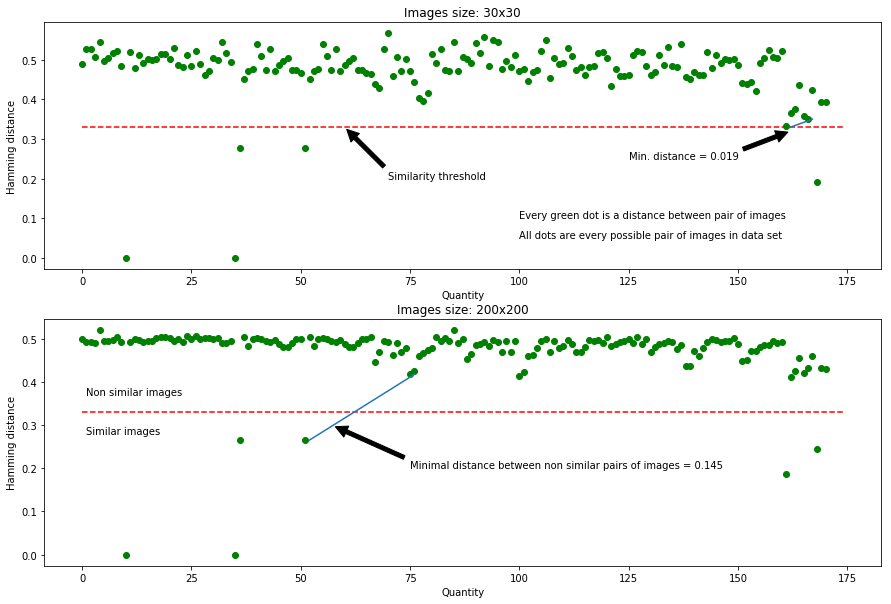

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

hamm_data_30x30 = []
with open('w_data_30x30.csv', 'r') as f:
    for line in f:
        hamm_data_30x30.append(float(line[:-1]))
        
hamm_data_200x200 = []
with open('w_data_200x200.csv', 'r') as f:
    for line in f:
        hamm_data_200x200.append(float(line[:-1]))
        

plt.figure(figsize=(15, 10))
plt.subplot(211)
plt.plot([0.33]*175, 'r--',hamm_data_30x30, 'go', [162,167],[0.33,0.35] )
plt.xlabel('Quantity')
plt.ylabel('Hamming distance')
plt.title('Images size: 30x30')
plt.annotate('Similarity threshold', xy=(60, 0.33), xytext=(70, 0.2), arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('Min. distance = 0.019', xy=(162, 0.32), xytext=(125, 0.25), arrowprops=dict(facecolor='black', shrink=0.05))
plt.text(100, 0.1, 'Every green dot is a distance between pair of images')
plt.text(100, 0.05, 'All dots are every possible pair of images in data set')

plt.subplot(212)
plt.plot([0.33]*175, 'r--',hamm_data_200x200, 'go', [52,  76], [0.265, 0.417])    #[52, 163], [0.265, 0.41])     #[0.265, 37], [0.41, 163])
plt.xlabel('Quantity')
plt.ylabel('Hamming distance')
plt.title('Images size: 200x200')
plt.annotate('Minimal distance between non similar pairs of images = 0.145', xy=(57, 0.3), xytext=(75, 0.2), arrowprops=dict(facecolor='black', shrink=0.05))
plt.text(1, 0.28, 'Similar images')
plt.text(1, 0.37, 'Non similar images')
plt.show()

# Disadvantages

Being capable to find duplicates and descent amount of similar images, this tool however does not provide user with totally accurate results, since some kinds of image modification aren't recognizable by the script.

Future research is necessary for finding others suitable algorithms for the task, merging them together to improve accuracy of this tool.

Links:
- https://github.com/moondra2017/Computer-Vision
- https://en.wikipedia.org/wiki/Hamming_distance
- http://ml-school.railsreactor.com/